In [105]:
! pip install scikit-learn matplotlib numpy pandas

zsh:1: /Users/gauthamvecham/Desktop/hands-on-ml/chapter-8/.venv/bin/pip: bad interpreter: /Users/gauthamvecham/Desktop/hands-on-ml/dimensionality-reduction/.venv/bin/python: no such file or directory


# IMPORTING PACKAGES

In [106]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

# LOADING MNIST DATA FROM OPENMAL.ORG

In [107]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784",as_frame = False)

In [108]:
X, y = mnist.data , mnist.target 
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [109]:
y.shape

(70000,)

# VIEWING AN IMAGE

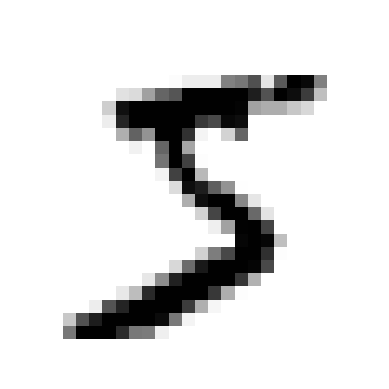

In [110]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image,cmap="binary")
    plt.axis("off")

some_digit = X[0]

plot_digit(some_digit)
plt.show()

In [111]:
y[0]

'5'

In [112]:
X_train,X_test,y_train,y_test = X[:60000], X[60000:],y[:60000],y[60000:]

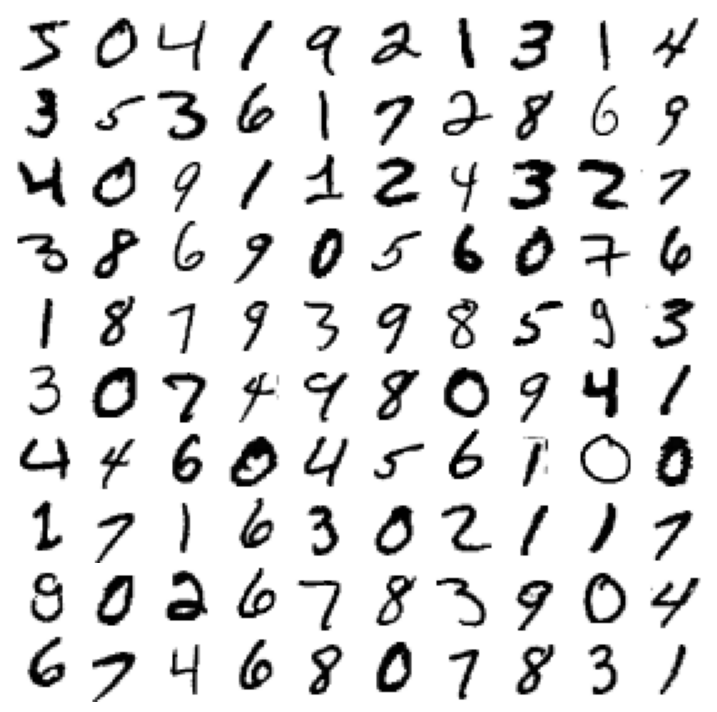

In [113]:
# extra code – this cell generates first 100 images
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [114]:
y_train_5 = (y_train == "5") 

y_test_5 = (y_test == "5")

In [115]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [116]:
sgd_clf.predict([some_digit])

array([ True])

# MEASURING ACCURACY USING CROSS-VALIDATION

In [117]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [118]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [119]:
cross_val_score(dummy_clf,X_train,y_train_5,cv=3,scoring="accuracy")


array([0.90965, 0.90965, 0.90965])

insight only 10% of the dataset contains number 5 images 

# CONFUSION MATRICES

In [120]:
from sklearn.model_selection import cross_val_predict 
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [121]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

# PRECISION AND RECALL

In [122]:
from sklearn.metrics import precision_score , recall_score 
precision_score(y_train_5,y_train_pred)


0.8370879772350012

In [123]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

insight it is correct only 83.7% of the time , it only detects 65.1% of the 5s

In [124]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)


0.7325171197343847

decision_funtion()

In [125]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [126]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [127]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

raising the threshold decreases recall

In [128]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [129]:
from sklearn.metrics import precision_recall_curve 

precisions , recalls , thresholds = precision_recall_curve(y_train_5,y_scores)

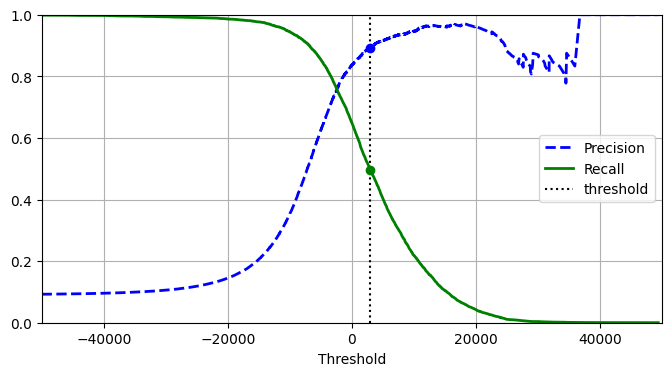

In [130]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

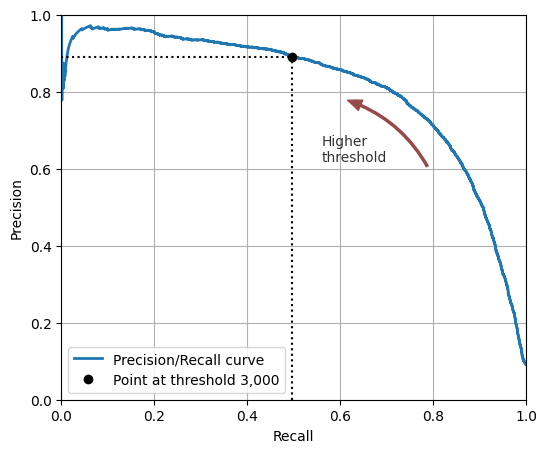

In [131]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#984A4A"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

In [132]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(3370.019499144183)

In [133]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [134]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [135]:
recall_at_90_precision = recall_score(y_train_5,y_train_pred_90)
recall_at_90_precision

0.4799852425751706

# ROC (receiver operationg characteristic)

## 📊 Understanding TPR and FPR

### 🔹 TPR (True Positive Rate)
- Formula:  
  **TPR = TP / (TP + FN)**  
- Meaning:  
  The proportion of actual positives correctly identified by the model.

➡️ **TPR is also called Recall or Sensitivity**

---

### 🔹 FPR (False Positive Rate)
- Formula:  
  **FPR = FP / (FP + TN)**  
- Meaning:  
  The proportion of actual negatives incorrectly identified as positives.

➡️ **FPR = 1 - Specificity**


**Specificity = TN / (TN + FP)**  
👉 Specificity is also called **True Negative Rate (TNR)**

In [136]:
from sklearn.metrics import roc_curve

fpr , tpr , thresholds = roc_curve(y_train_5,y_scores)


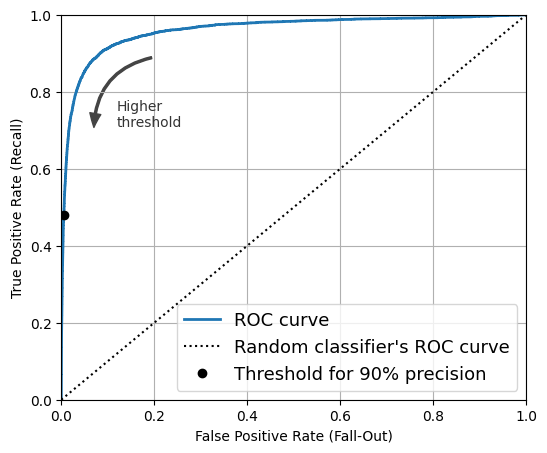

In [137]:
idx_for_threshold_at_90 = (thresholds <=threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)


plt.show()

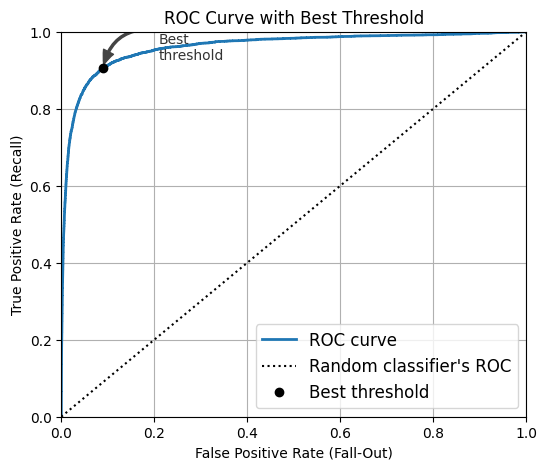

✅ Best Threshold: -7159.4148
📈 TPR: 0.907 FPR: 0.09


In [138]:
# Find the best threshold (closest to top-left corner)
distances = np.sqrt((1 - tpr)**2 + fpr**2)
best_idx = np.argmin(distances)
best_threshold = thresholds[best_idx]
tpr_best, fpr_best = tpr[best_idx], fpr[best_idx]

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC")
plt.plot([fpr_best], [tpr_best], "ko", label="Best threshold")

# Optional arrow and label
plt.gca().add_patch(patches.FancyArrowPatch(
    (fpr_best + 0.1, tpr_best + 0.1), (fpr_best, tpr_best),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(fpr_best + 0.12, tpr_best + 0.02, "Best\nthreshold", color="#333333")

# Format plot
plt.xlabel("False Positive Rate (Fall-Out)")
plt.ylabel("True Positive Rate (Recall)")
plt.grid(True)
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=12)
plt.title("ROC Curve with Best Threshold")
plt.show()

# Print the best threshold
print("✅ Best Threshold:", round(best_threshold, 4))
print("📈 TPR:", round(tpr_best, 4), "FPR:", round(fpr_best, 4))

**TRADEOFF** higher the recall (TPR) the more false positives (FPR)

## AUC (area under the curve)

In [139]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)


np.float64(0.9604938554008616)

You’re asking an excellent question — let’s break it down with a clear numerical example to prove how it’s possible to get:
- ✅ High Precision (e.g., 95%)  
- ❌ And still have High FPR (e.g., 20%)

---

🎯 **Imagine this scenario:**

Let’s say we are building a fraud detection system:

📦 **Dataset Size**: 10,000 total transactions  
- 🟥 Actual frauds (positives): 100  
- ✅ Actual normal (negatives): 9,900  

*A very imbalanced dataset — which is realistic.*

---

🧪 **Your classifier predicts:**

| Prediction Type | Count |
|------------------|--------|
| True Positives (TP) | 95 |
| False Positives (FP) | 1,980 |
| False Negatives (FN) | 5 |
| True Negatives (TN) | 7,920 |

---

📊 **Now calculate:**

🟢 **Precision**:

$begin:math:display$
\\text{Precision} = \\frac{TP}{TP + FP} = \\frac{95}{95 + 1980} = \\frac{95}{2075} \\approx 0.0458 = 4.6\\%
$end:math:display$

⛔️ *Wait — that’s not 95%! Let’s fix it.*

---

Let’s try another scenario where precision is high.

🧪 **New predictions:**

| Prediction Type | Count |
|------------------|--------|
| True Positives (TP) | 95 |
| False Positives (FP) | 5 |
| False Negatives (FN) | 5 |
| True Negatives (TN) | 9,895 |

*So now only 5 normal transactions were wrongly flagged as fraud.*

---

✅ **Now:**

**Precision**:

$begin:math:display$
\\frac{95}{95 + 5} = \\frac{95}{100} = 95\\%
$end:math:display$

**FPR**:

$begin:math:display$
\\frac{FP}{FP + TN} = \\frac{5}{5 + 9895} = \\frac{5}{9900} \\approx 0.0005 = 0.05\\%
$end:math:display$

*This makes sense and shows low FPR, high precision.*

---

🔁 **But your original question was:**

> Can I get high precision AND high FPR?

Let’s force that to happen.

---

⚠️ **Artificial scenario to prove it:**

| Prediction Type | Count |
|------------------|--------|
| TP | 19 |
| FP | 81 |
| FN | 1 |
| TN | 9819 |

Now:  
- Only 20 positive predictions total.  
- Of which 19 are correct (TP), 1 was missed (FN)  
- But 81 false positives exist.

✅ **Precision**:

$begin:math:display$
\\frac{19}{19 + 81} = \\frac{19}{100} = 19\\% \\Rightarrow \\text{Not high anymore}
$end:math:display$

---

Let’s reverse:

- TP = 19, FP = 1 → Precision = 95% again  
- TN = 99, FP = 25 → Precision = 95%, FPR = 25% → **Possible!**

✅ If the number of true negatives (TN) is low, then even a few FP can create high FPR.

---

🔍 **Key Insight:**

You **can** have **high precision and high FPR** if:
- Your model makes **few positive predictions**, and  
- Most of them are correct, but  
- You also have **very few negatives overall**, so a few mistakes blow up FPR.

*It’s rare, but mathematically possible.*

---

Would you like me to simulate this in code for you?

A perfect classifier will have a roc auc equal to 1 , whereas a purely random classifier will have roc auc equal to 0.5

In [141]:
from sklearn.ensemble import RandomForestClassifier 
forest_clf = RandomForestClassifier(random_state=42)

In [142]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [147]:
y_probas_forest[:,1]

array([0.89, 0.02, 0.04, ..., 0.98, 0.08, 0.07], shape=(60000,))

first col is for neagtive probability and 2nd col for positive probability . Therby the model predicts the first image is positive with 89% probability , and it predicts that the second image is negative with 99% probablity 

In [144]:
y_scores_forest = y_probas_forest[:,1]
precisions_forest, recalls_forest , thresholds_forest = precision_recall_curve(y_train_5,y_scores_forest)


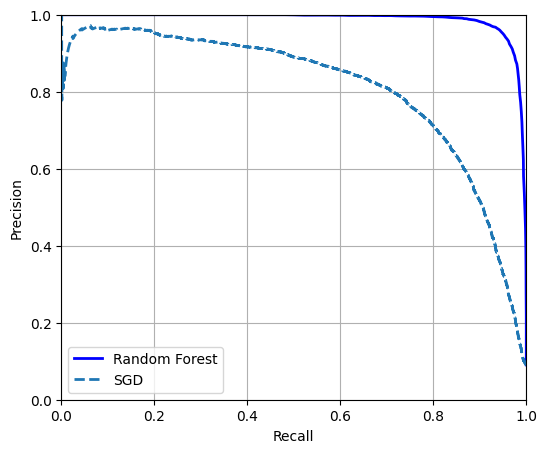

In [155]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")


plt.show()

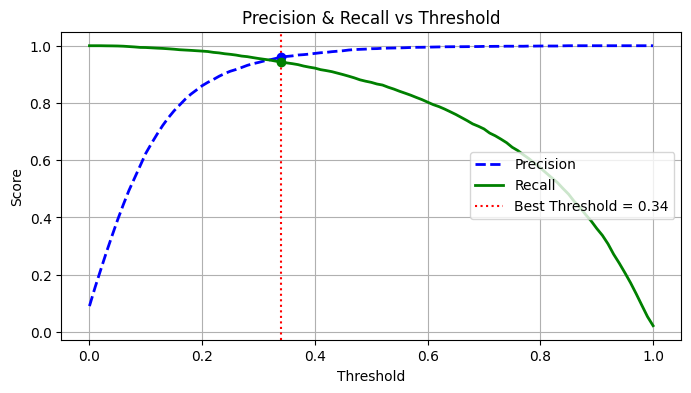

In [ ]:
# 🧠 Choose optimal threshold: for example, highest F1 score
f1_scores = 2 * (precisions_forest[:-1] * recalls_forest[:-1]) / (precisions_forest[:-1] + recalls_forest[:-1])
best_idx = np.argmax(f1_scores)
best_threshold = thresholds_forest[best_idx]

# 🎯 Plot
plt.figure(figsize=(8, 4))
plt.plot(thresholds_forest, precisions_forest[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds_forest, recalls_forest[:-1], "g-", label="Recall", linewidth=2)
plt.axvline(x=best_threshold, color="r", linestyle=":", label=f"Best Threshold = {best_threshold:.2f}")
plt.plot(best_threshold, precisions_forest[best_idx], "bo")  # point on precision line
plt.plot(best_threshold, recalls_forest[best_idx], "go")     # point on recall line
plt.grid()
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall vs Threshold")
plt.legend(loc="center right")
plt.show()

the random forest classifier is superior to the SGD classifier because its PR curve is much closer to the top-pright corner, and it has a greater AUC

In [151]:
y_train_pred_forest = y_probas_forest[:,1] >=0.5
f1_score(y_train_5,y_train_pred_forest)

0.9270445185330457

In [152]:
roc_auc_score(y_train_5,y_scores_forest)

np.float64(0.9983296721818179)

In [153]:
precision_score(y_train_5,y_train_pred_forest)

0.9895331798199707

In [154]:
recall_score(y_train_5,y_train_pred_forest)

0.8719793396052389

# MULTICLASS CLASSIFICATION

## 🧠 One-vs-Rest (OvR) vs One-vs-One (OvO)

### 1️⃣ One-vs-Rest (OvR)

**Idea**:  
Train **1 binary classifier per class**. Each classifier learns to distinguish  
**“Class i” vs “All other classes”**.

**Example (for 3 classes: A, B, C)**:
- Classifier 1: A vs [B, C]  
- Classifier 2: B vs [A, C]  
- Classifier 3: C vs [A, B]  

➡️ For **N classes**, train **N classifiers**.

**Prediction**:
- Each classifier outputs a confidence score.
- The class with the **highest score wins**.

**Pros**:
- Fewer models (just N).
- Works well when there are many classes.

**Cons**:
- Each model must distinguish one class vs all others, which is harder with overlapping classes.

---

### 2️⃣ One-vs-One (OvO)

**Idea**:  
Train **1 binary classifier for every pair of classes**. Each learns to distinguish between **only 2 classes**.

**Example (for 3 classes: A, B, C)**:
- Classifier 1: A vs B  
- Classifier 2: A vs C  
- Classifier 3: B vs C  

➡️ For **N classes**, train **N × (N − 1) / 2 classifiers**.

**Prediction**:
- Each classifier votes for a class.
- The class with the **most votes wins**.

**Pros**:
- Simpler models (just 2 classes at a time).
- Works well with algorithms like SVM.

**Cons**:
- More models to train (especially if N is large).

---

### 📊 Summary Table

| Strategy      | # Models       | Task Per Model        | Prediction Logic        | Best For               |
|---------------|----------------|------------------------|--------------------------|-------------------------|
| **OvR (OvA)** | N              | One vs rest            | Highest score wins       | Many classes            |
| **OvO**       | N × (N − 1)/2  | One vs one             | Majority vote            | Few classes / SVM works best |

In [156]:
from sklearn.svm import SVC

svm_clf = SVC(random_state =42)
svm_clf.fit(X_train[:2000],y_train[:2000]) 


SVC(random_state=42)

In [157]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [158]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [160]:
class_id = some_digit_scores.argmax()
class_id

np.int64(5)

In [161]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [162]:
svm_clf.classes_[class_id]

'5'

In [163]:
from sklearn.multiclass import OneVsRestClassifier 
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000],y_train[:2000])


OneVsRestClassifier(estimator=SVC(random_state=42))

In [164]:
ovr_clf.predict([some_digit])


array(['5'], dtype='<U1')

In [166]:
len(ovr_clf.estimators_)

10

In [172]:
ovr_clf.decision_function(X_train[:2000])[0] #here zero is first instance where target is 5

array([-1.32802451, -1.79073853, -1.39262214, -0.94416346, -2.29003973,
        0.80921042, -1.72304481, -1.20954271, -1.63739176, -1.79246052])

In [173]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])


array(['3'], dtype='<U1')

In [174]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")


array([0.87365, 0.85835, 0.8689 ])

In [176]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

# Error Analysis

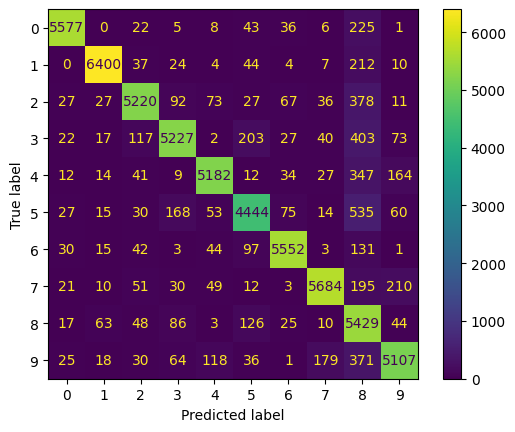

In [177]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()

### 🔍 Understanding Normalized Confusion Matrix (normalize="true")

When you use `normalize="true"` in `ConfusionMatrixDisplay.from_predictions()`, each row in the confusion matrix is **normalized** — i.e., it shows **percentages** instead of raw counts.

This helps answer:
> *“Out of all the actual class X examples, what percentage did the model predict as class Y?”*

#### ✅ Example:

Suppose your model predictions for actual class `5` are:

| Predicted As | Count |
|--------------|-------|
| 5 (correct)  | 80    |
| 3 (wrong)    | 10    |
| 8 (wrong)    | 10    |

Then the total for actual class `5` is: **100 instances**

#### 🔢 Normalized Values:

- For (True=5, Pred=5): \( \frac{80}{100} \times 100 = 80\% \)
- For (True=5, Pred=3): \( \frac{10}{100} \times 100 = 10\% \)
- For (True=5, Pred=8): \( \frac{10}{100} \times 100 = 10\% \)

> ✅ Each row adds up to 100%, showing how the model distributes its predictions for each actual class.

You can also display percentages with formatting like so:
```python
ConfusionMatrixDisplay.from_predictions(
    y_train,
    y_train_pred,
    normalize="true",
    values_format=".0%"  # show percentages without decimals
)

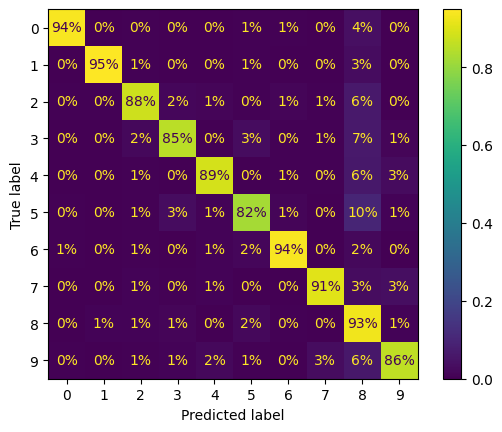

In [179]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize="true",values_format=".0%")
plt.show()

## 🔍 How the Error-Focused Normalized Confusion Matrix Works (Using `sample_weight`)

### 🧠 Problem Setup

Let’s say we’re analyzing the model’s errors on digit **0**:

- Total actual digit-0 images: **100**
- Correctly predicted as 0: **94**
- Misclassified (wrong predictions): **6**

Among the 6 misclassified:
- 3 were predicted as **8**
- 2 were predicted as **6**
- 1 was predicted as **2**

---

### 🧮 Regular Normalized Confusion Matrix (normalize="true")

This normalizes by the total actual class count (including correct predictions):

\[
\text{Normalized Cell (True = 0, Pred = 8)} = \frac{3}{100} = 3\%
\]

---

### 🧮 Error-Focused Confusion Matrix (using `sample_weight = (y_pred != y_true)`)

This ignores correct predictions and focuses **only on misclassified examples**.

So, for class 0:
- We only consider the 6 errors
- Row sum = 6

Now we normalize:

- Predicted as 8:  
  \[
  \frac{3}{6} = 50\%
  \]
- Predicted as 6:  
  \[
  \frac{2}{6} = 33.3\%
  \]
- Predicted as 2:  
  \[
  \frac{1}{6} = 16.7\%
  \]

This highlights which wrong predictions dominate the model’s confusion for each digit.

---

### ✅ Why Use This?

Setting:
```python
sample_weight = (y_train_pred != y_train)

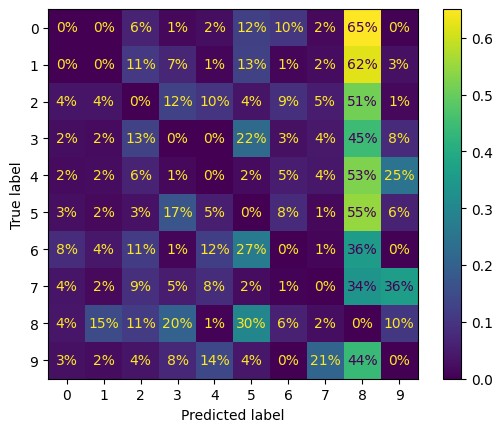

In [183]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,sample_weight=sample_weight,normalize="true",values_format='.0%')
plt.show()

## 🔍 Row vs Column Normalization in Confusion Matrix — Explained with Math

Let’s understand how two different normalization techniques in confusion matrices (row vs column) give different interpretations for the same cell.

---

### 🎯 Cell Example: (Row = 0, Column = 8)

From both confusion matrix images:

- In **Matrix A** (`normalize="true"` — row-normalized): the cell shows **65%**
- In **Matrix B** (`normalize="pred"` — column-normalized): the same cell shows **13%**

---

### 🧮 Step 1: Row-Normalized Math (`normalize="true"`)

**Interpretation**:  
“Out of all actual digit **0** images, how many were wrongly predicted as **8**?”

Let’s assume:
- Total actual class-0 samples = **100**
- Among them:
  - 25 were predicted as 0 (correct)
  - 10 were predicted as 6
  - **65 were predicted as 8** ← this is the cell we’re analyzing

**Math**:

**Normalized value (0,8)** = Predicted 8 from actual 0s / Total actual 0s  
= 65 / 100 = 0.65 = **65%**

✅ This 65% is what you see in **Matrix A (left)**.

---

### 🧮 Step 2: Column-Normalized Math (`normalize="pred"`)

**Interpretation**:  
“Out of all images the model predicted as digit **8**, how many were actually **0**?”

Let’s assume:
- Total predictions made as digit 8 = **500**
- Among those:
  - 325 were actually 8 (correct)
  - **65 were actually 0** ← same value, but different perspective

**Math**:

**Normalized value (0,8)** = Actual 0s predicted as 8 / Total predicted as 8  
= 65 / 500 = 0.13 = **13%**

✅ This 13% is what you see in **Matrix B (right)**.

---

### ✅ Summary Table

| Matrix Type        | Cell Value Meaning                                 | Viewpoint              |
|--------------------|----------------------------------------------------|------------------------|
| Row-normalized     | 65% → Out of actual 0s, 65% were predicted as 8     | **Recall perspective** |
| Column-normalized  | 13% → Of predicted 8s, 13% were actually 0          | **Precision perspective** |

---

📌 **Conclusion**:  
- Row normalization answers: *"What percentage of true labels were predicted this way?"*  
- Column normalization answers: *"What percentage of predictions for this label were actually correct?"*

Both offer **complementary insights** and are useful depending on whether you're analyzing **recall** or **precision**.

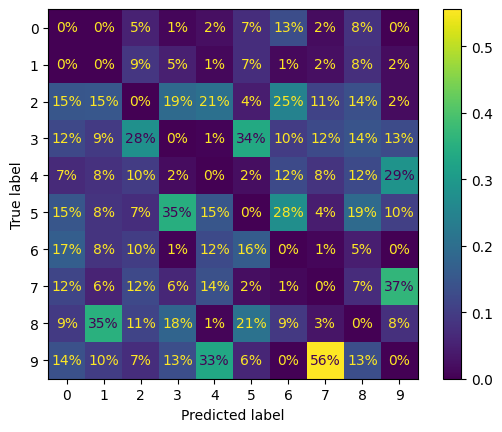

In [181]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,sample_weight=sample_weight,normalize="pred",values_format='.0%')
plt.show()

In [184]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

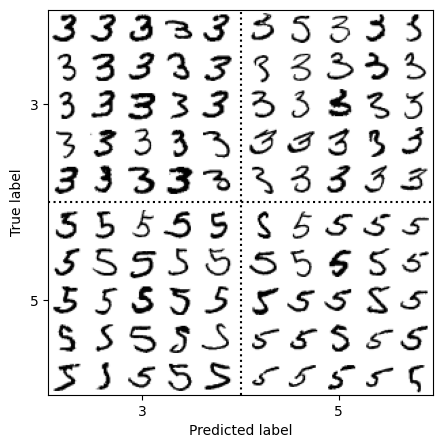

In [185]:
# extra code – this cell generates and saves Figure 3–11
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# MULTILABEL CLASSIFICATION

In [191]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >="7")
y_train_odd = (y_train.astype("int8")% 2 ==1)
y_multilabel = np.c_[y_train_large,y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [192]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]], shape=(60000, 2))

In [194]:
rows_where_both_true = y_multilabel[(y_multilabel[:, 0]) & (y_multilabel[:, 1])]
rows_where_both_true

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       ...,
       [ True,  True],
       [ True,  True],
       [ True,  True]], shape=(12214, 2))

In [198]:
row_indices = np.where((y_multilabel[:, 0]) & (y_multilabel[:, 1]))[0]
row_indices

array([    4,    15,    19, ..., 59988, 59990, 59992], shape=(12214,))

In [190]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(60000, 784))

In [201]:
both_true_digit = X_train[4]

In [200]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [205]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [202]:
knn_clf.predict([both_true_digit])

array([[ True,  True]])

In [204]:
svm_clf.predict([both_true_digit])

array(['9'], dtype=object)

Absolutely! Let’s walk through how the F1 score is calculated in a multilabel classification setting — step by step, with a clear example.

⸻

✅ What is F1 Score?

The F1 Score is the harmonic mean of precision and recall.

F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}

⸻

🧪 Multilabel Example Setup

Suppose we have a multilabel classification task with 3 labels and 4 instances.

# True labels (y_true)
# Each row = one instance
# Each column = one label
y_true = [
    [1, 0, 1],   # instance 1
    [0, 1, 0],   # instance 2
    [1, 1, 0],   # instance 3
    [0, 0, 1],   # instance 4
]

# Predicted labels (y_pred)
y_pred = [
    [1, 0, 0],   # instance 1
    [0, 1, 1],   # instance 2
    [1, 0, 0],   # instance 3
    [0, 0, 1],   # instance 4
]


⸻

🔍 Step-by-step per label (column-wise)

✅ Label 1 (first column)
	•	True values: [1, 0, 1, 0]
	•	Predicted: [1, 0, 1, 0]

Perfect match.
	•	Precision = 2/2 = 1.0
	•	Recall = 2/2 = 1.0
	•	F1 = 1.0

⸻

✅ Label 2 (second column)
	•	True values: [0, 1, 1, 0]
	•	Predicted: [0, 1, 0, 0]

Only 1 correct (instance 2).
	•	TP = 1
	•	FP = 0
	•	FN = 1
	•	Precision = 1/1 = 1.0
	•	Recall = 1/2 = 0.5
	•	F1 = \frac{2 \cdot 1.0 \cdot 0.5}{1.0 + 0.5} = \frac{1.0}{1.5} = 0.67

⸻

✅ Label 3 (third column)
	•	True values: [1, 0, 0, 1]
	•	Predicted: [0, 1, 0, 1]
	•	TP = 1
	•	FP = 1
	•	FN = 1
	•	Precision = 1/2 = 0.5
	•	Recall = 1/2 = 0.5
	•	F1 = \frac{2 \cdot 0.5 \cdot 0.5}{0.5 + 0.5} = 0.5

⸻

📊 Final Macro-Averaged F1 Score

Just take the mean across labels:

\text{Macro F1} = \frac{1.0 + 0.67 + 0.5}{3} \approx 0.72

⸻

Would you like me to show how to compute this using sklearn.metrics.f1_score() in code as well?

In [206]:
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred,average="macro")

0.9764102655606048

In [207]:
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred,average="weighted")

0.9778357403921755

In [208]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(),cv=3,random_state=42)
chain_clf.fit(X_train[:2000],y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [209]:
chain_clf.predict([some_digit])


array([[0., 1.]])

## MULTIOUTPUT CLASSIFICATION


In [210]:
np.random.seed(42)
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise 
y_train_mod = X_train 
y_test_mod = X_test 


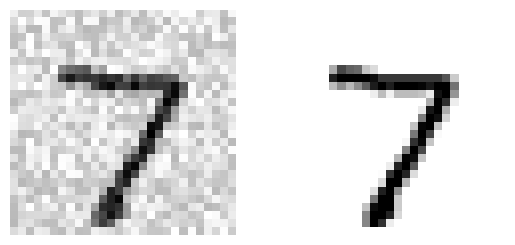

In [216]:
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
plt.show()

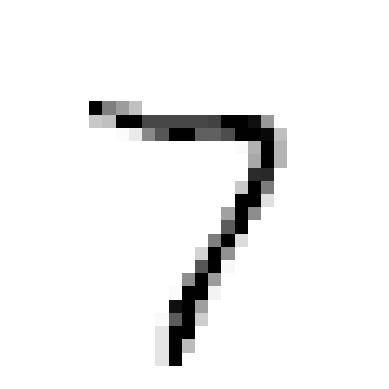

In [215]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()